In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install seaborn
!pip install statsmodels
!pip install pyprocessmacro
!pip install scikit-learn
!pip install pyreadstat
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

import warnings
warnings.filterwarnings('ignore')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 kB 1.6 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 27.5 MB/s eta 0:00:00
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 38 not upgraded.
Need to get 9,599 kB of archives.
After this operation, 29.6 MB of additional disk space will be used.
Get:1 http://archive.ub

In [3]:
import pandas
import pyreadstat 
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols
import statsmodels.api as sm
from pyprocessmacro import Process

dtafile = '/content/drive/MyDrive/Analysis_0602/refugee_0426.2023.dta'
df, meta = pyreadstat.read_dta(dtafile)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Columns: 287 entries, no to _Ireligion2_2
dtypes: float64(279), int64(6), object(2)
memory usage: 1.8+ MB


In [4]:
# 데이터 값 변경 
df.replace({"q92":{1:0, 2:1, 3:2, 4:3, 5:4},
            "q96":{1:0, 2:1, 3:2, 4:3, 5:4},
            "q97":{1:0, 2:1, 3:2, 4:3, 5:4},
            "q175":{2:0}}, inplace=True)

In [5]:
# 데이터 컬럼명 변경 
df.rename(columns = {'q1r_gender' : 'gender',
                       'q2_1':'age',
                       'q175':'child',
                       '_Iq5_region_1':'region_1',
                       '_Iq5_region_2':'region_2',
                       'q180edu2':'edulevel',
                       'q181':'income',
                       '_Ireligion2_1':'religion_1',
                       '_Ireligion2_2':'religion_2',
                       'q92':'dir_contact',
                       'q96':'massmedia',
                       'q97':'sns',
                     'q99':'dir_cont_qual',
                     'q103':'mass_media_qual',
                     'q104':'sns_qual',
                       'q43':'poli_pers',
                       'q44':'relig_pers',
                       'q45':'econo',
                       'q46':'fake',
                       'q153':'pol_orien'}, inplace = True)

In [6]:
# 다양한 데이터셋 구성 

# N = 800 
columns = ["gender", "age", "child", "region_1", "region_2", "edulevel", "income", "religion_1", "religion_2", 
           "T_realf", "T_symbf", "T_safecoh2", "T_health", "dir_contact", "massmedia", "sns",
           "poli_pers", "relig_pers", "econo", "fake", 
           "humani", "nat_eth2", "nat_cit2", "SDO_D", "SDO_E", "rightw", "pol_orien", "islamo", "socd_p", "socd_n", "beh_p", "beh_n"]
df_800 = df[columns]

# N = 410 (직접 접촉 경험 o)
df_410 = df[df["dir_cont_qual"] != 6.0]
columns = ["gender", "age", "child", "region_1", "region_2", "edulevel", "income", "religion_1", "religion_2", 
           "T_realf", "T_symbf", "T_safecoh2", "T_health", "dir_contact", "massmedia", "sns", 'dir_cont_qual',
           "poli_pers", "relig_pers", "econo", "fake", 
           "humani", "nat_eth2", "nat_cit2", "SDO_D", "SDO_E", "rightw", "pol_orien", "islamo", "socd_p", "socd_n", "beh_p", "beh_n"]
df_410 = df_410[columns]

# N = 715 (대중매체 접촉 경험 o)
df_715 = df[df["mass_media_qual"] != 6.0]
columns = ["gender", "age", "child", "region_1", "region_2", "edulevel", "income", "religion_1", "religion_2", 
           "T_realf", "T_symbf", "T_safecoh2", "T_health", "dir_contact", "massmedia", "sns", 'mass_media_qual',
           "poli_pers", "relig_pers", "econo", "fake", 
           "humani", "nat_eth2", "nat_cit2", "SDO_D", "SDO_E", "rightw", "pol_orien", "islamo", "socd_p", "socd_n", "beh_p", "beh_n"]
df_715 = df_715[columns]

# N = 591 (SNS 접촉 경험 o)
df_591 = df[df["sns_qual"] != 6.0]
columns = ["gender", "age", "child", "region_1", "region_2", "edulevel", "income", "religion_1", "religion_2", 
           "T_realf", "T_symbf", "T_safecoh2", "T_health", "dir_contact", "massmedia", "sns", 'sns_qual',
           "poli_pers", "relig_pers", "econo", "fake", 
           "humani", "nat_eth2", "nat_cit2", "SDO_D", "SDO_E", "rightw", "pol_orien", "islamo", "socd_p", "socd_n", "beh_p", "beh_n"]
df_591 = df_591[columns]

In [ ]:
# 다중회귀분석  
def regression_model(df, y_data):
    
    x_data = df.drop(["beh_n", "beh_p"], axis=1)
    x_data_add = sm.add_constant(x_data, has_constant = "add")
    y_data = y_data
    
    reg_model = sm.OLS(y_data, x_data_add)
    fitted_reg_model = reg_model.fit()
    return fitted_reg_model.summary()


# 조절효과분석
def moderation_model(df, x_var, m_var, y_var):
    
    control_var = df.drop(["beh_n", "beh_p"], axis=1).columns.tolist()
    control_var.remove(x_var)
    control_var.remove(m_var)
    
    p = Process(data=df, 
            model=1, 
            x=x_var, 
            m=m_var,
            y=y_var, 
            controls=control_var)
    print(f"******************** 종속변수 {y_var}에 대한 {x_var} x {m_var}의 조절효과 분석 결과********************")
    return p.summary()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# 회귀분석 예시 
y_list = ["beh_p", "beh_n"]
df_list = [df_800, df_410, df_715, df_591]
n_list = [800, 410, 715, 591]
for (df, n) in zip(df_list, n_list):
  for y in y_list:
    print(f"               n = {n}일때, 종속변수 {y}에 대한 회귀분석 결과")
    print(regression_model(df, df[y]))
    print()
    print()

               n = 800일때, 종속변수 beh_p에 대한 회귀분석 결과
                            OLS Regression Results                            
Dep. Variable:                  beh_p   R-squared:                       0.628
Model:                            OLS   Adj. R-squared:                  0.613
Method:                 Least Squares   F-statistic:                     43.24
Date:                Sun, 04 Jun 2023   Prob (F-statistic):          3.11e-143
Time:                        07:33:41   Log-Likelihood:                -615.98
No. Observations:                 800   AIC:                             1294.
Df Residuals:                     769   BIC:                             1439.
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
c

In [ ]:
# 조절효과 

y_list = ["beh_p", "beh_n"]

for y in y_list:
  moderation_model(df = df_410, x_var="dir_contact", m_var="dir_cont_qual", y_var=y)

for y in y_list:
  moderation_model(df = df_715, x_var="massmedia", m_var="mass_media_qual", y_var=y)

for y in y_list:
  moderation_model(df = df_591, x_var="sns", m_var="sns_qual", y_var=y)

Process successfully initialized.
Based on the Process Macro by Andrew F. Hayes, Ph.D. (www.afhayes.com)


****************************** SPECIFICATION ****************************

Model = 1

Variables:
    Cons = Cons
    x = dir_contact
    m = dir_cont_qual
    y = beh_p
Statistical Controls:
 gender, age, child, region_1, region_2, edulevel, income, religion_1, religion_2, T_realf, T_symbf, T_safecoh2, T_health, massmedia, sns, poli_pers, relig_pers, econo, fake, humani, nat_eth2, nat_cit2, SDO_D, SDO_E, rightw, pol_orien, islamo, socd_p, socd_n



Sample size:
410
******************** 종속변수 beh_p에 대한 dir_contact x dir_cont_qual의 조절효과 분석 결과********************

***************************** OUTCOME MODELS ****************************

Outcome = beh_p 
OLS Regression Summary

     R²  Adj. R²    MSE       F  df1  df2  p-value
 0.7011   0.6748 0.2536 27.6276   32  377   0.0000

Coefficients

                            coeff     se       t      p    LLCI    ULCI
Cons                 

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _AltairImportHook.find_spec() not found; falling back to find_module()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _AltairImportHook.find_spec() not found; falling back to find_module()


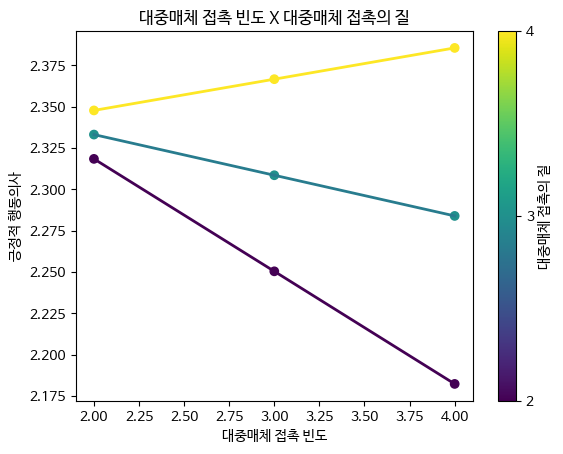

In [ ]:
# DATA LIST FREE/ 
#    massmedi   mass_qua   beh_p      . 
# BEGIN DATA. 
#      2.0000     2.0000     2.3185 
#      3.0000     2.0000     2.2505 
#      4.0000     2.0000     2.1824 
#      2.0000     3.0000     2.3332 
#      3.0000     3.0000     2.3086 
#      4.0000     3.0000     2.2840 
#      2.0000     4.0000     2.3478 
#      3.0000     4.0000     2.3667 
#      4.0000     4.0000     2.3856 
# END DATA. 
# GRAPH/SCATTERPLOT= 
#  massmedi WITH     beh_p    BY       mass_qua .

import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic') 

# 데이터 설정
massmedi = [2.0000, 3.0000, 4.0000, 2.0000, 3.0000, 4.0000, 2.0000, 3.0000, 4.0000]
mass_qua = [2.0000, 2.0000, 2.0000, 3.0000, 3.0000, 3.0000, 4.0000, 4.0000, 4.0000]
beh_p = [2.3185, 2.2505, 2.1824, 2.3332, 2.3086, 2.2840, 2.3478, 2.3667, 2.3856]

# Scatter plot 그리기
scatter = plt.scatter(massmedi, beh_p, c=mass_qua, cmap='viridis')  # massmedi를 x축으로, beh_p를 y축으로 설정하고, mass_qua에 따라 색상을 다르게 표시

# 선 그래프 그리기 # linestyle ='-.'
for i in range(len(massmedi) - 1):
    if mass_qua[i] == 2 and mass_qua[i+1] == 2:  # Connect yellow scatterplot points with yellow line
        plt.plot([massmedi[i], massmedi[i + 1]], [beh_p[i], beh_p[i + 1]], c='#440154FF', linewidth=2) 
    elif mass_qua[i] == 3 and mass_qua[i+1] == 3:  # Connect green scatterplot points with green line
        plt.plot([massmedi[i], massmedi[i + 1]], [beh_p[i], beh_p[i + 1]], c='#287C8EFF', linewidth=2)
    elif mass_qua[i] == 4 and mass_qua[i+1] == 4:  # Connect blue scatterplot points with blue line
        plt.plot([massmedi[i], massmedi[i + 1]], [beh_p[i], beh_p[i + 1]], c='#FDE725FF', linewidth=2)


# 축과 제목 설정
plt.xlabel('대중매체 접촉 빈도')
plt.ylabel('긍정적 행동의사')
plt.title('대중매체 접촉 빈도 X 대중매체 접촉의 질')

# 범례 설정
plt.colorbar(scatter, ticks=[2, 3, 4], label='대중매체 접촉의 질')  # 범례에 2, 3, 4만 표시

# 그래프 출력
plt.show()

# 그림으로 저장
# plt.savefig('/content/drive/MyDrive/Analysis_0602/moderating_graph.png') 

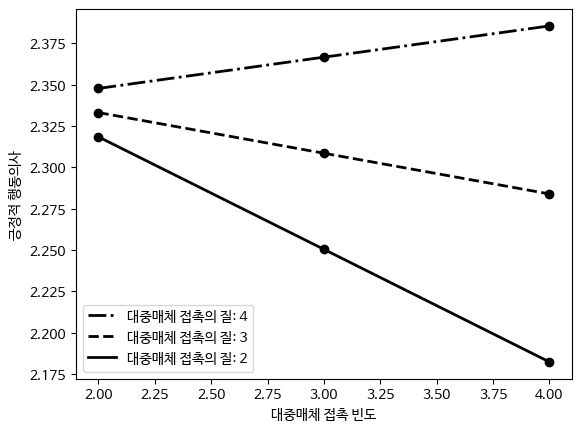

In [ ]:
# Scatter plot 그리기
scatter = plt.scatter(massmedi, beh_p, color='black')  # massmedi를 x축으로, beh_p를 y축으로 설정하고, 점 색상을 검은색으로 표시

# 선 그래프 그리기
lines_dict = {}
for i in range(len(massmedi) - 1):
    if mass_qua[i] == 2 and mass_qua[i + 1] == 2:
        line, = plt.plot([massmedi[i], massmedi[i + 1]], [beh_p[i], beh_p[i + 1]], linewidth=2, color='black')
        lines_dict.setdefault('대중매체 접촉의 질: 2', line)
    elif mass_qua[i] == 3 and mass_qua[i + 1] == 3:
        line, = plt.plot([massmedi[i], massmedi[i + 1]], [beh_p[i], beh_p[i + 1]], linewidth=2, linestyle='--', color='black')
        lines_dict.setdefault('대중매체 접촉의 질: 3', line)
    elif mass_qua[i] == 4 and mass_qua[i + 1] == 4:
        line, = plt.plot([massmedi[i], massmedi[i + 1]], [beh_p[i], beh_p[i + 1]], linewidth=2, linestyle='-.', color='black')
        lines_dict.setdefault('대중매체 접촉의 질: 4', line)

# 축과 제목 설정
plt.xlabel('대중매체 접촉 빈도')
plt.ylabel('긍정적 행동의사')
# plt.title('대중매체 접촉 빈도 X 대중매체 접촉의 질')

# 범례 설정
lines = list(lines_dict.values())
labels = list(lines_dict.keys())
plt.legend(list(reversed(lines)), list(reversed(labels)))

# 그래프 출력
plt.show()

In [13]:
df_800["region_2"].value_counts()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0    790
1     10
Name: region_2, dtype: int64

In [14]:
# 지역1 426
# 지역2 10 
print(800-426-10)

364


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [15]:
print(364/800) 0.46
print(426/800) 0.53
print(10/800) 0.01

0.455
0.5325
0.0125


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
